In [2]:
%matplotlib inline

modules import


In [3]:
import pandas as pd
import geopandas
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 300 

Data imput. I used the file locally, but the file is in the Github repo and available at the kaggle line
The code 

This code is adapted from https://geopandas.org/gallery/create_geopandas_from_pandas.html



In [4]:
df = pd.read_csv("/home/laurence/Downloads/database.csv")

In [5]:
gdf = geopandas.GeoDataFrame(
    df, geometry=geopandas.points_from_xy(df.Longitude, df.Latitude))

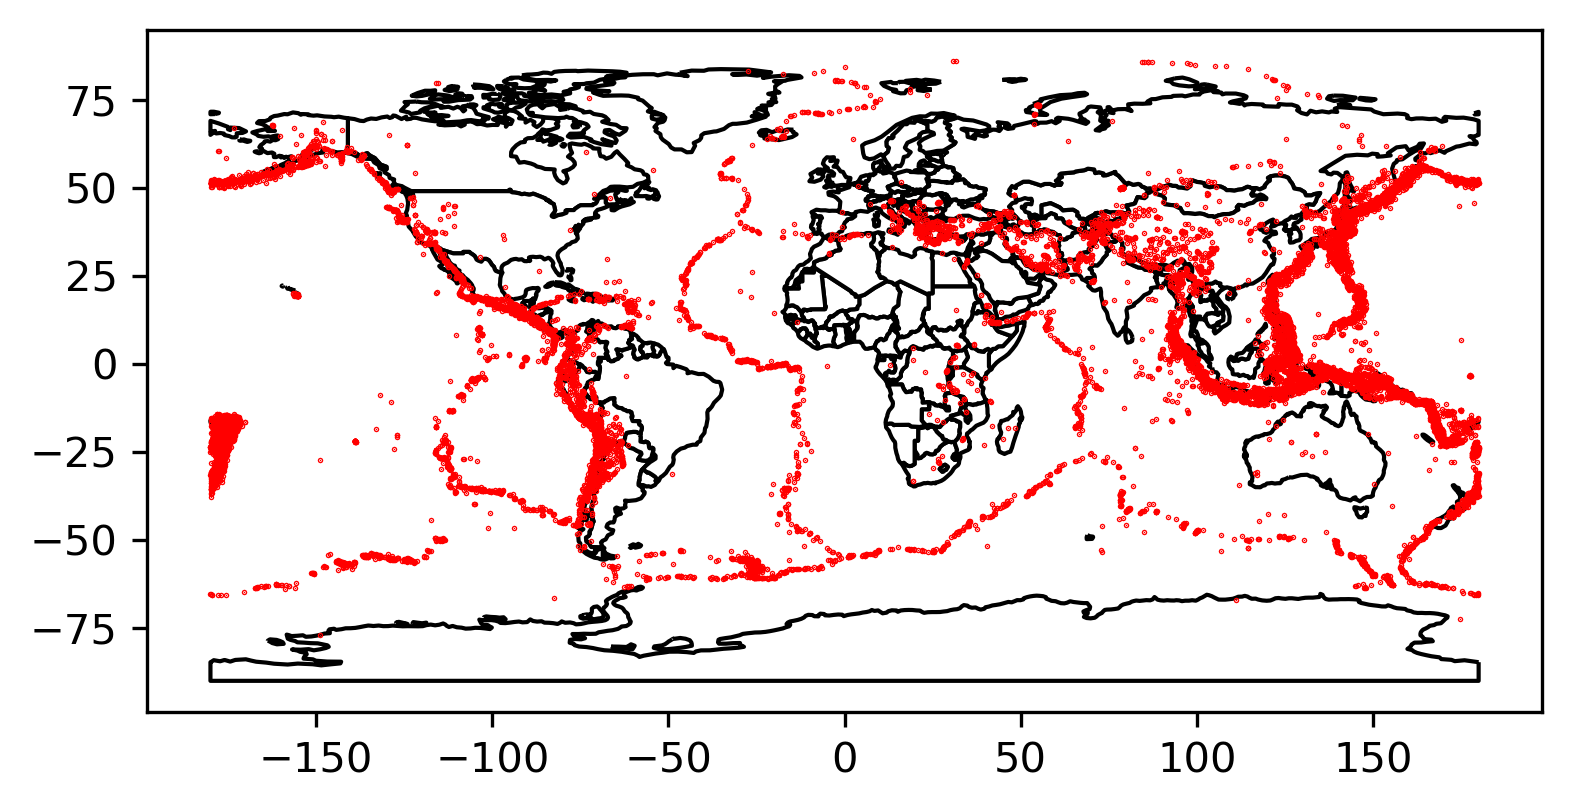

In [19]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))


ax = world.plot(
    color='white', edgecolor='black', vmin=2,vmax=2)


gdf.plot(ax=ax, color='red',markersize=0.1)

plt.show()

In [7]:
df.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status,geometry
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic,POINT (145.61600 19.24600)
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic,POINT (127.35200 1.86300)
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic,POINT (-173.97200 -20.57900)
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic,POINT (-23.55700 -59.07600)
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic,POINT (126.42700 11.93800)


This code is edited from https://www.earthdatascience.org/courses/use-data-open-source-python/use-time-series-data-in-python/date-time-types-in-pandas-python/

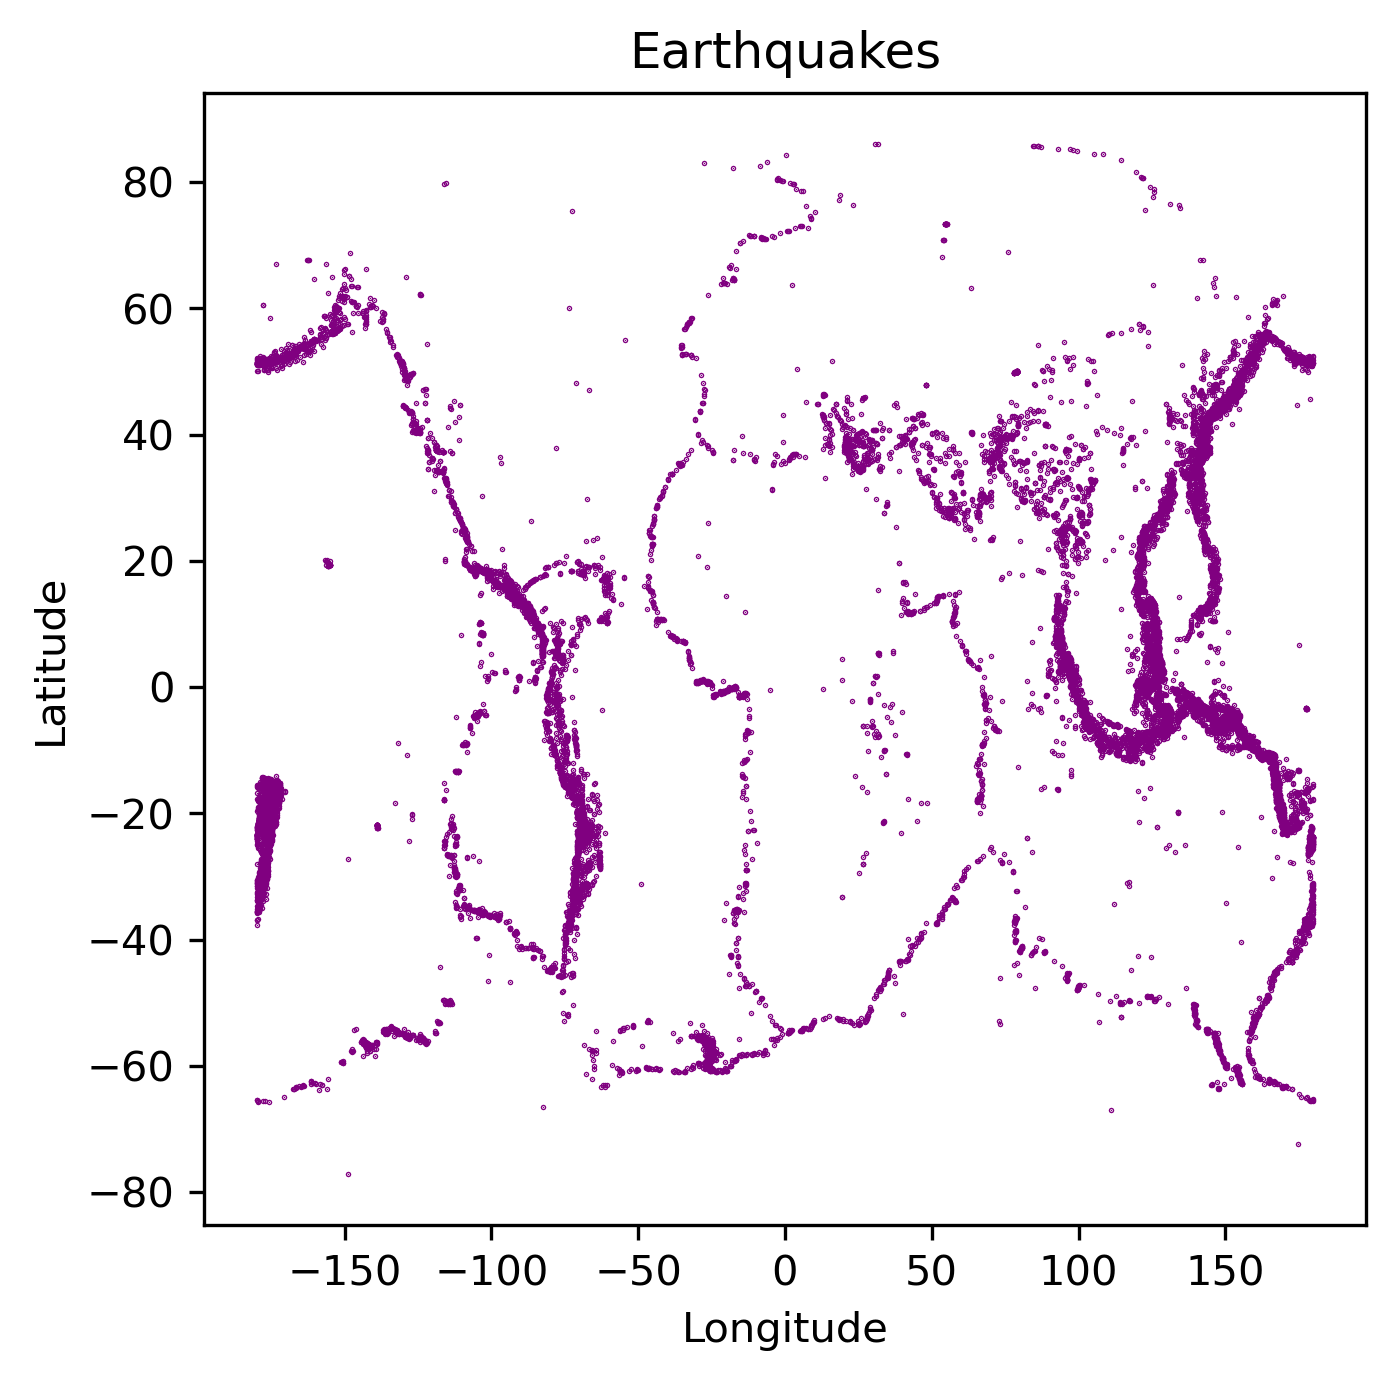

In [79]:

fig, ax = plt.subplots(figsize=(5, 5))
ax.scatter(df.Longitude,df.Latitude,
        color='purple', s=0.1)
ax.set(xlabel="Longitude",
       ylabel="Latitude",
       title="Earthquakes")

plt.show()

Histograms and box for depth and Magnitude
Boxplots based on https://matplotlib.org/3.1.1/gallery/pyplots/boxplot_demo_pyplot.html#sphx-glr-gallery-pyplots-boxplot-demo-pyplot-py

Histograms based on
https://www.w3schools.com/python/matplotlib_histograms.asp


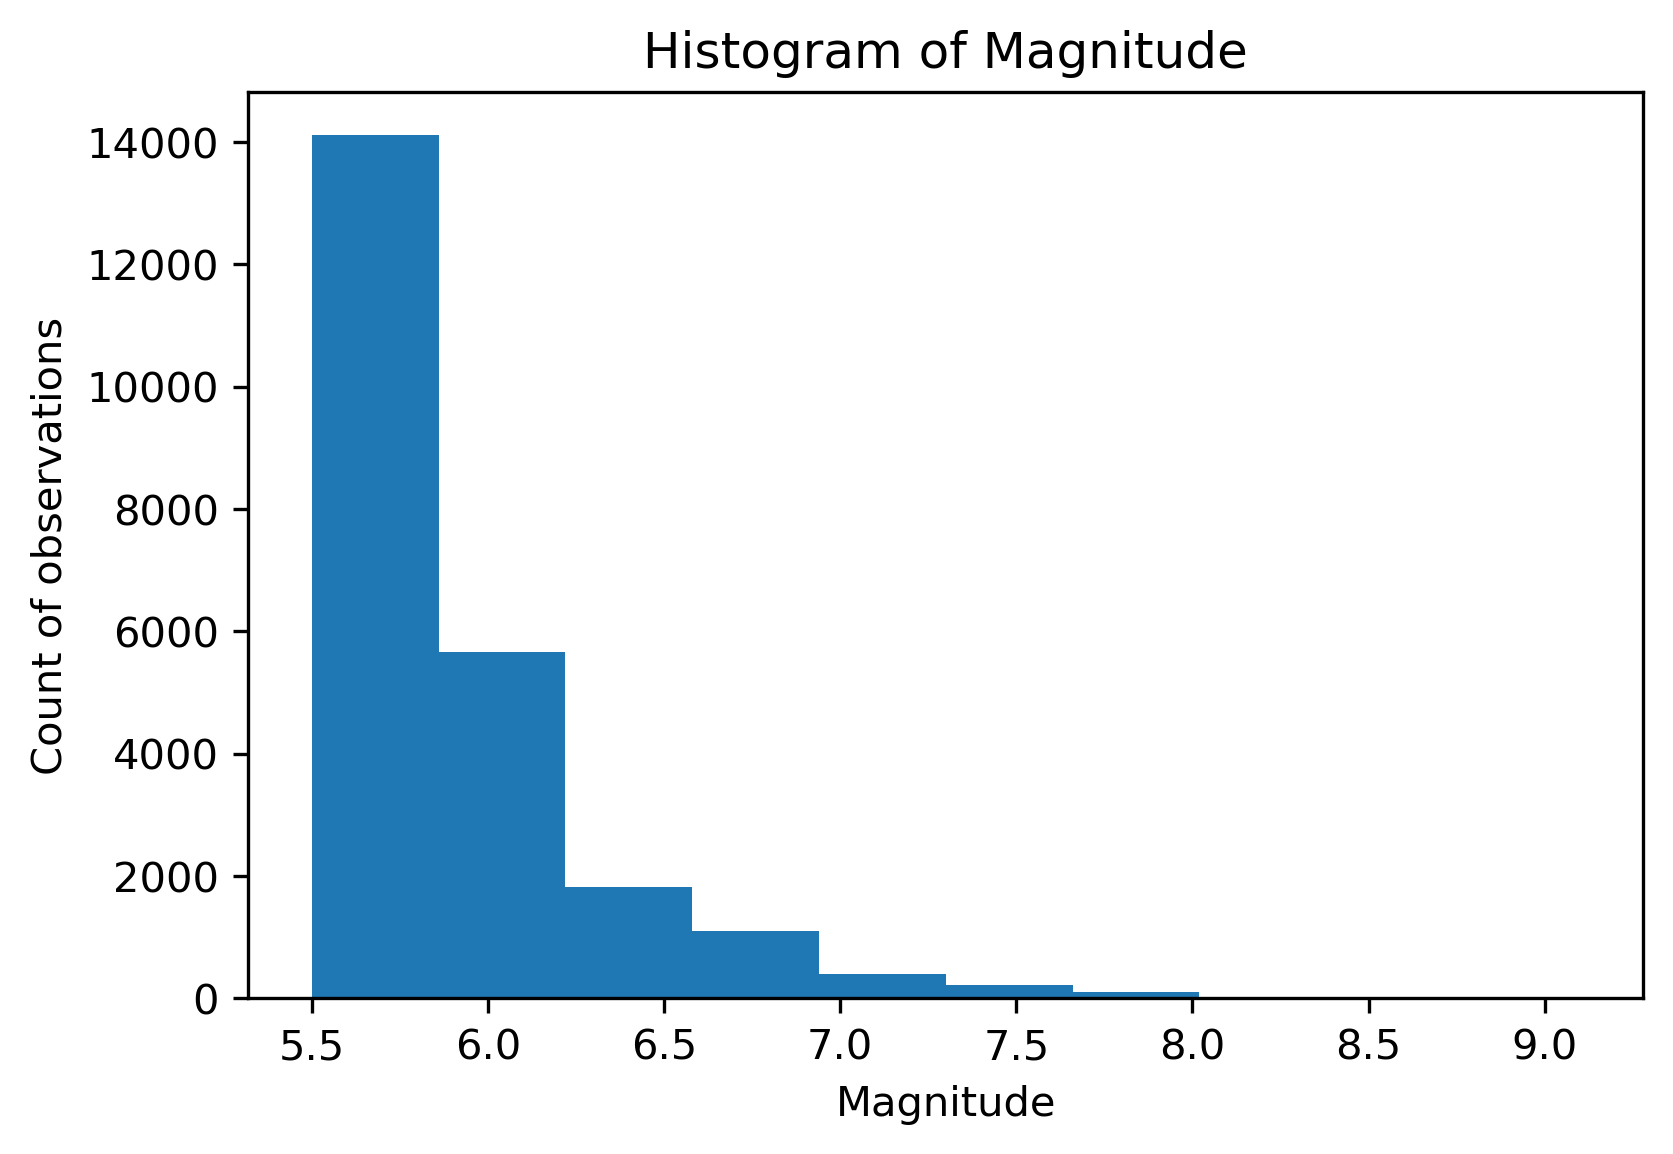

In [56]:
data=df.Magnitude
fig1, ax1 = plt.subplots()
ax1.set_title('Histogram of Magnitude')
ax1.set_ylabel("Count of Observations")
ax1.set_xlabel("Magnitude")
plt.hist(data, bins=10)
plt.show() 

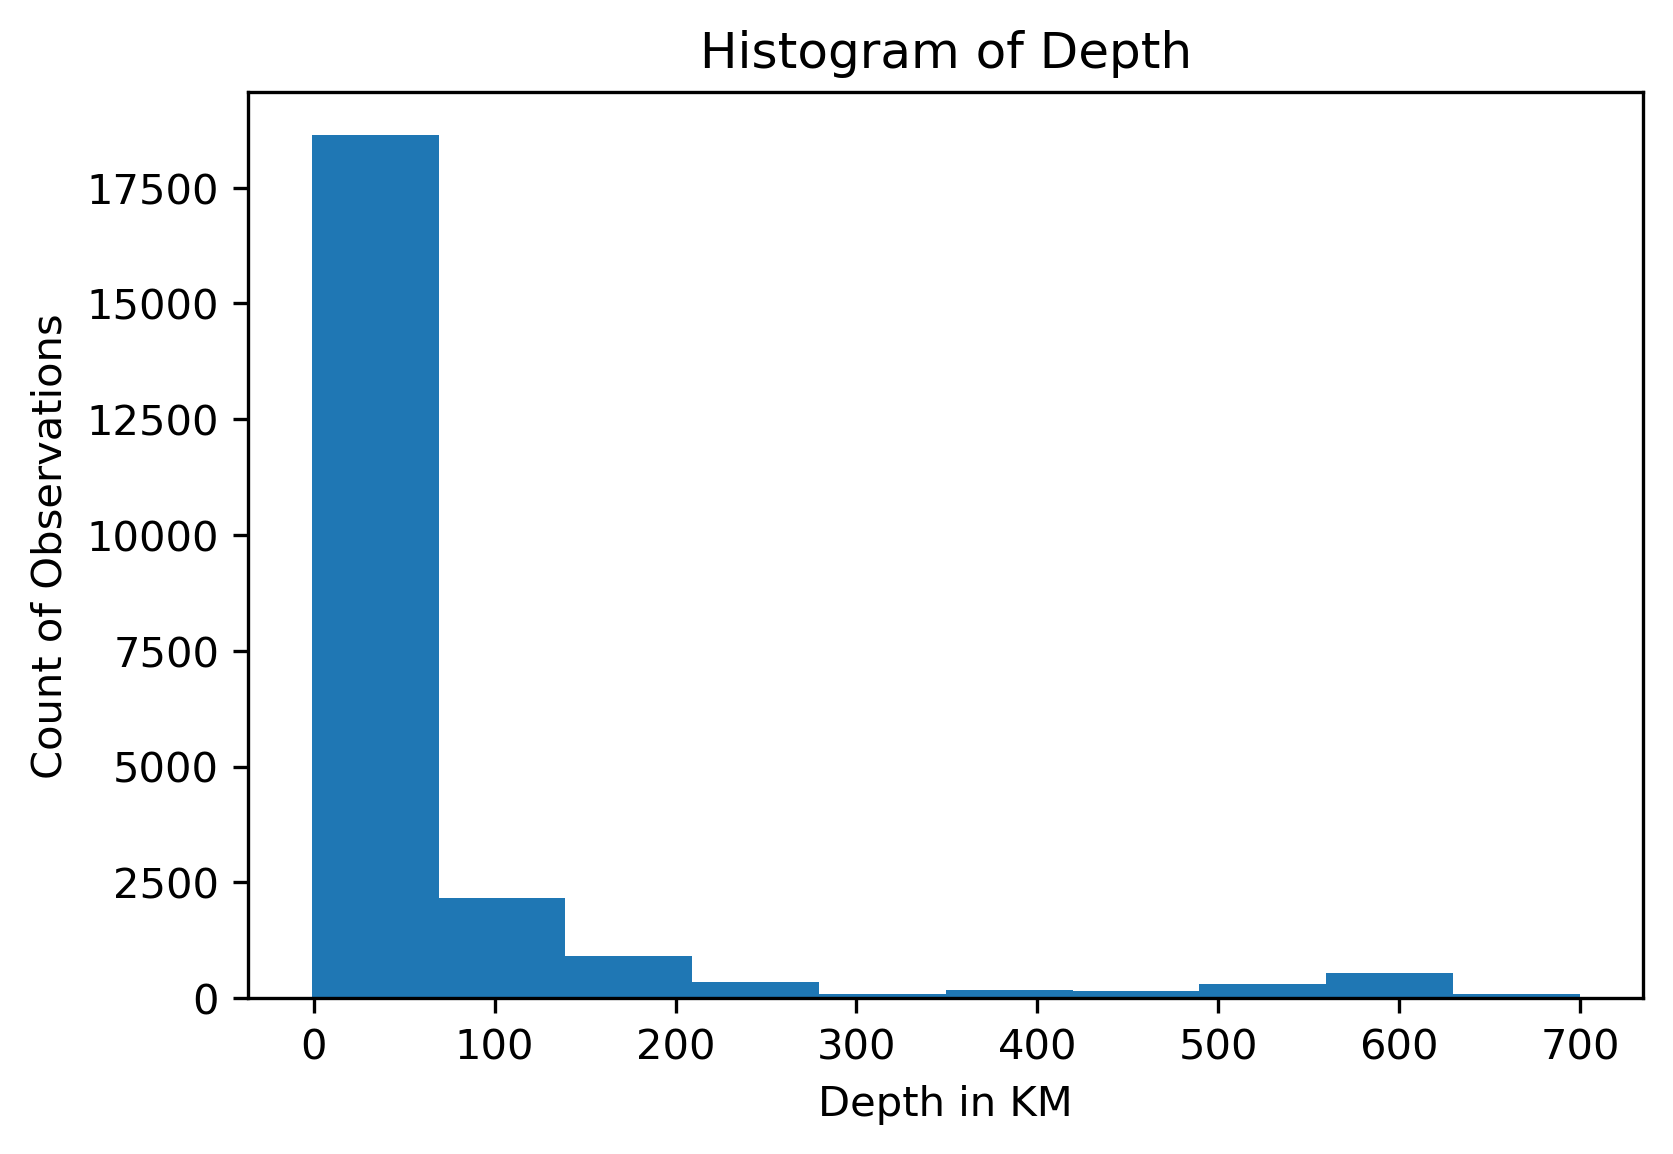

In [85]:
data=df.Depth
fig2, ax2 = plt.subplots()
ax2.set_title('Histogram of Depth')
ax2.set_ylabel("Count of Observations")
ax2.set_xlabel("Depth in KM")
plt.hist(data, bins=10)
plt.show() 

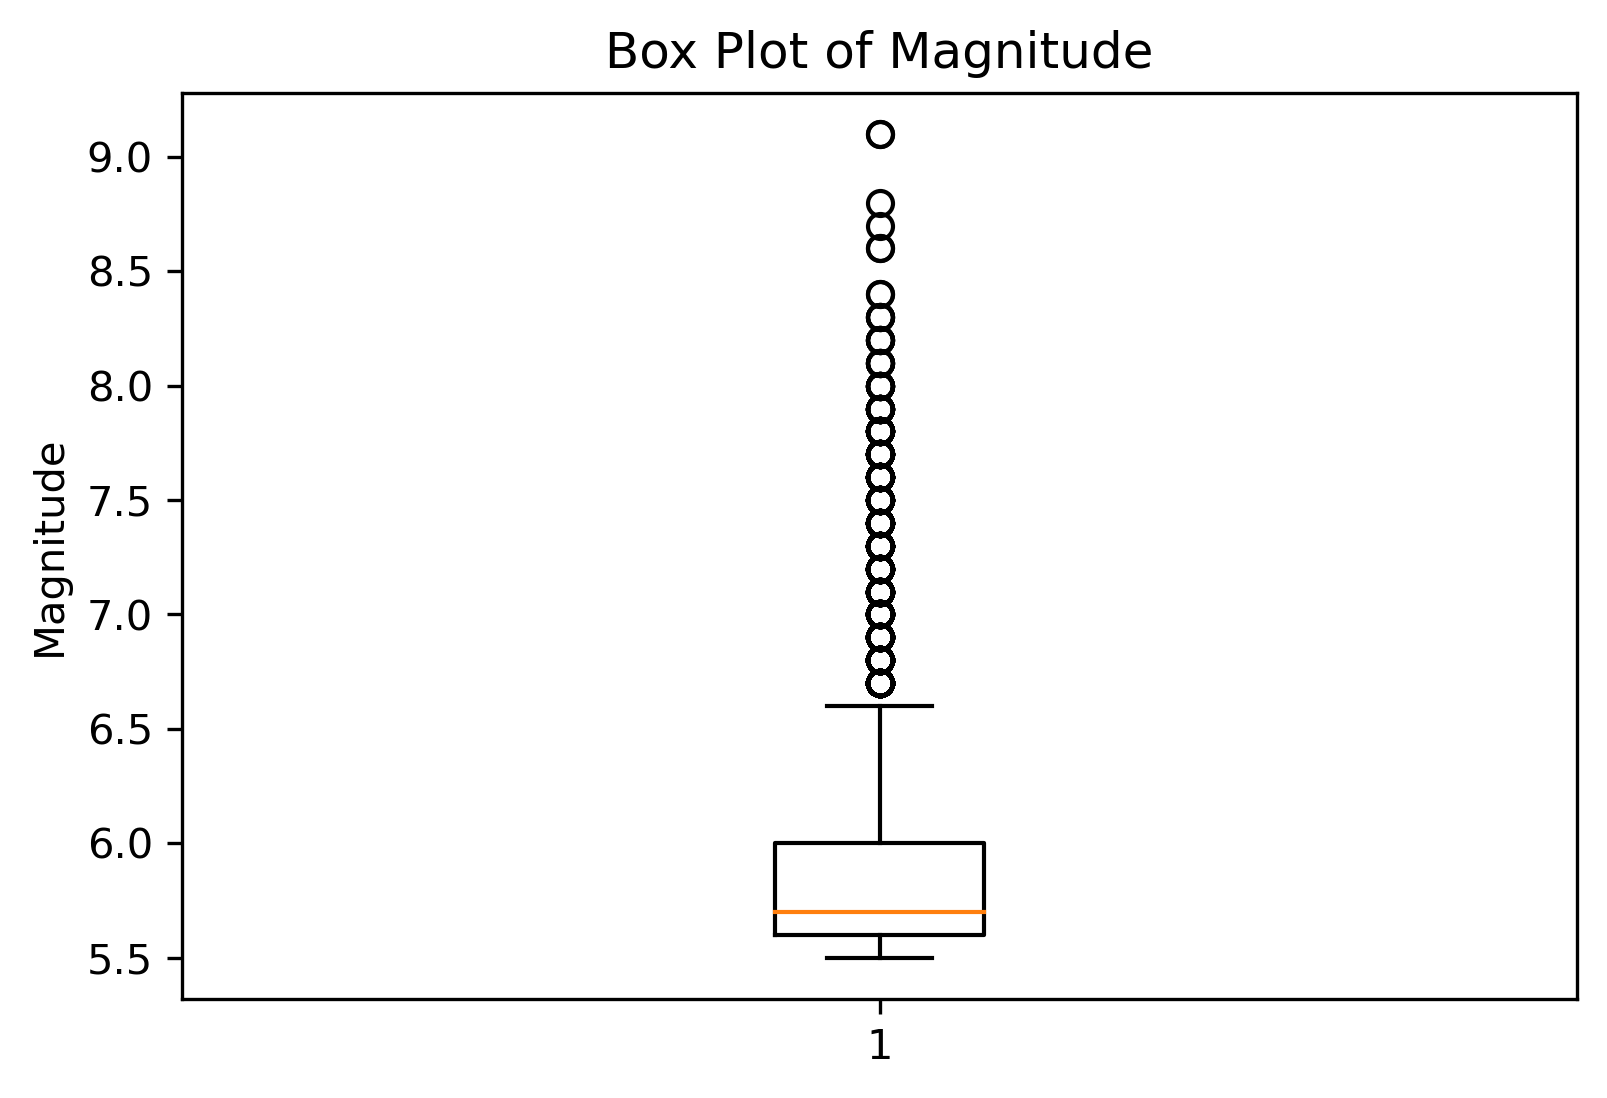

In [68]:

data = [df.Magnitude]
fig3, ax3 = plt.subplots()
ax3.set_title('Box Plot of Magnitude')
ax3.set_ylabel("Magnitude")
ax3.boxplot(data)

plt.show()



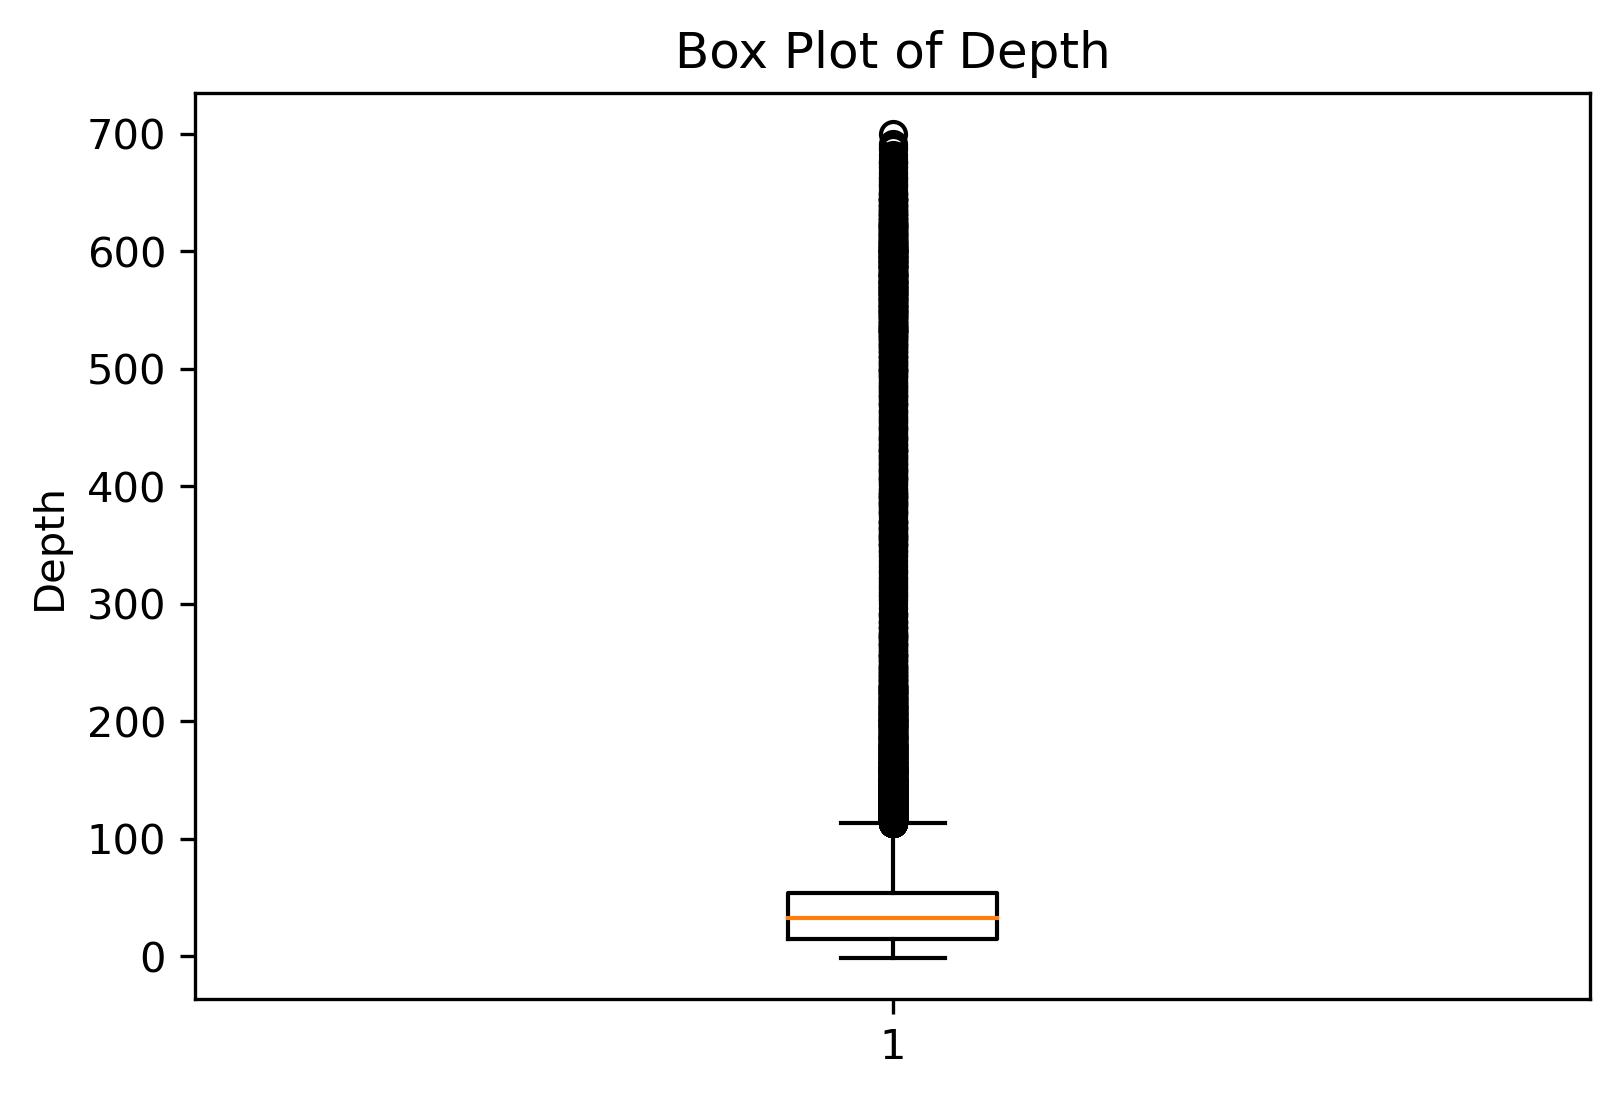

In [71]:
data = [df.Depth]
fig4, ax4 = plt.subplots()
ax4.set_title('Box Plot of Depth')
ax4.set_ylabel("Depth")
ax4.boxplot(data)

plt.show()

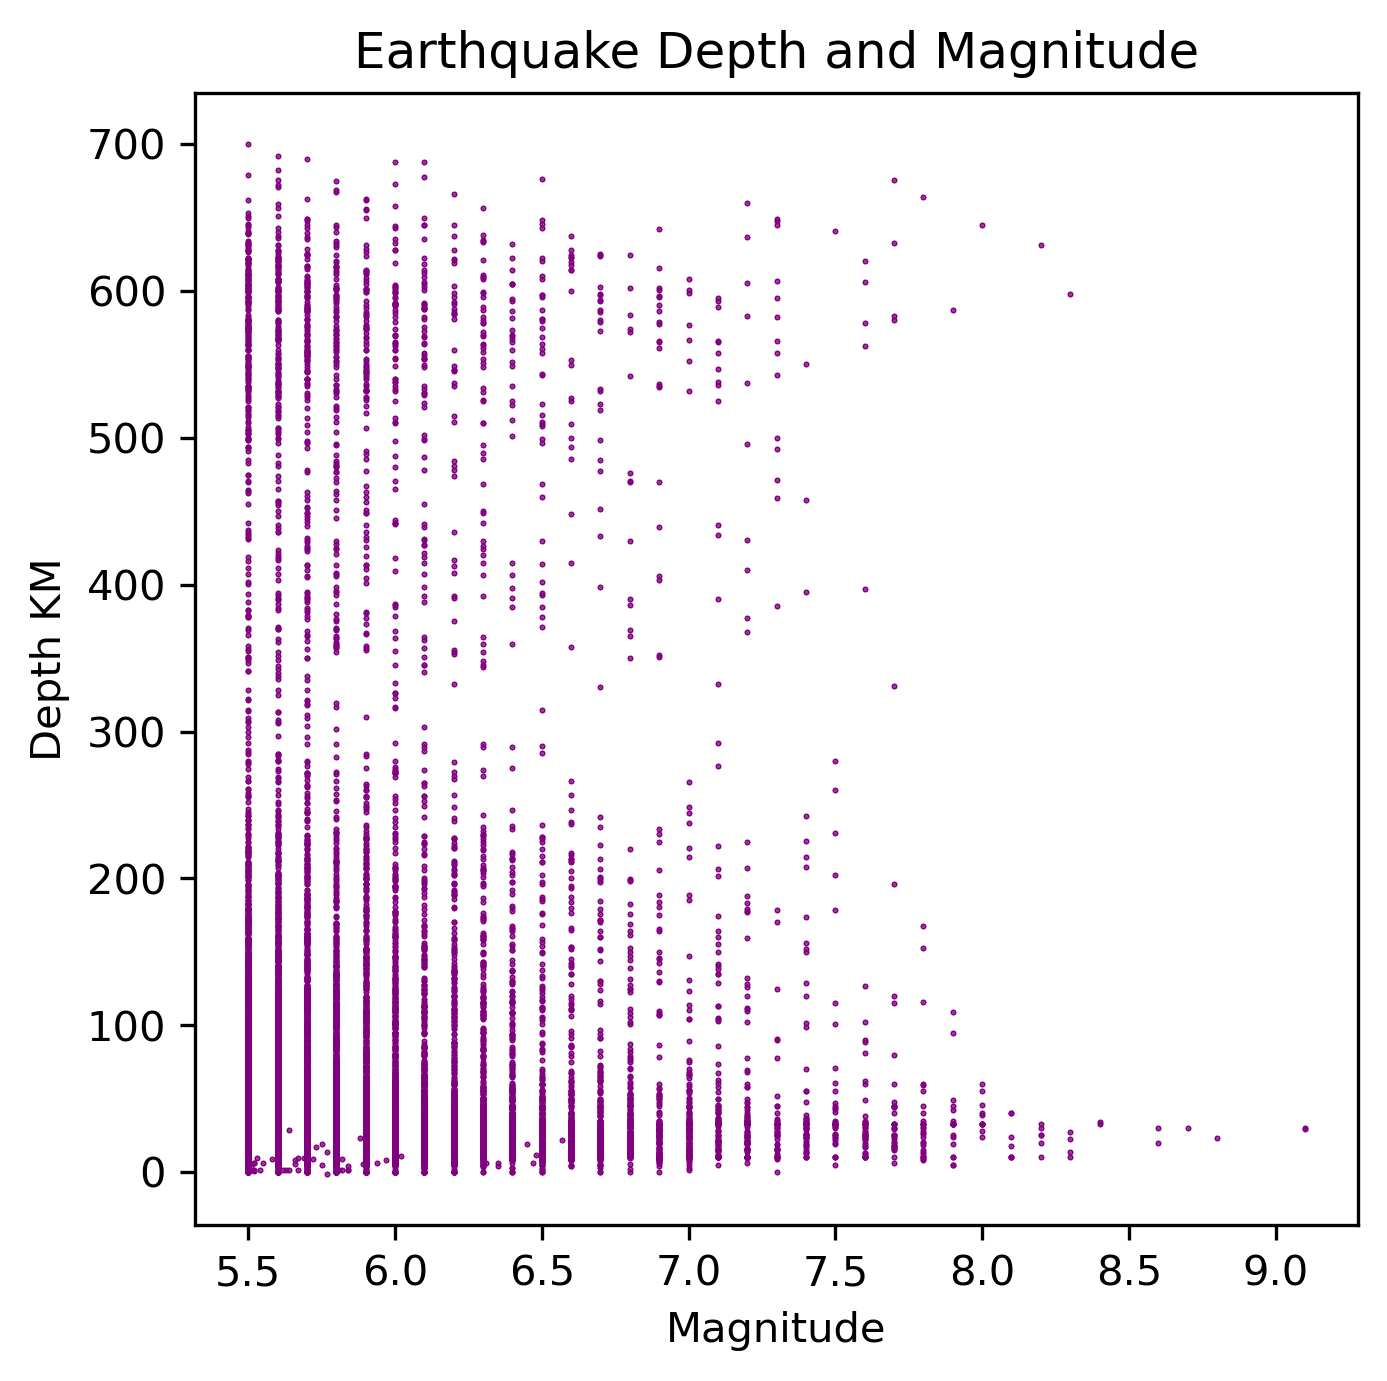

In [84]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.scatter(df.Magnitude,df.Depth,
        color='purple', s=0.2)
ax.set(xlabel="Magnitude",
       ylabel="Depth KM",
       title="Earthquake Depth and Magnitude")

plt.show()

adapted fromhttps://www.geeksforgeeks.org/3d-scatter-plotting-in-python-using-matplotlib/#:~:text=A%203D%20Scatter%20Plot%20is,to%20enable%20three%20dimensional%20plotting.

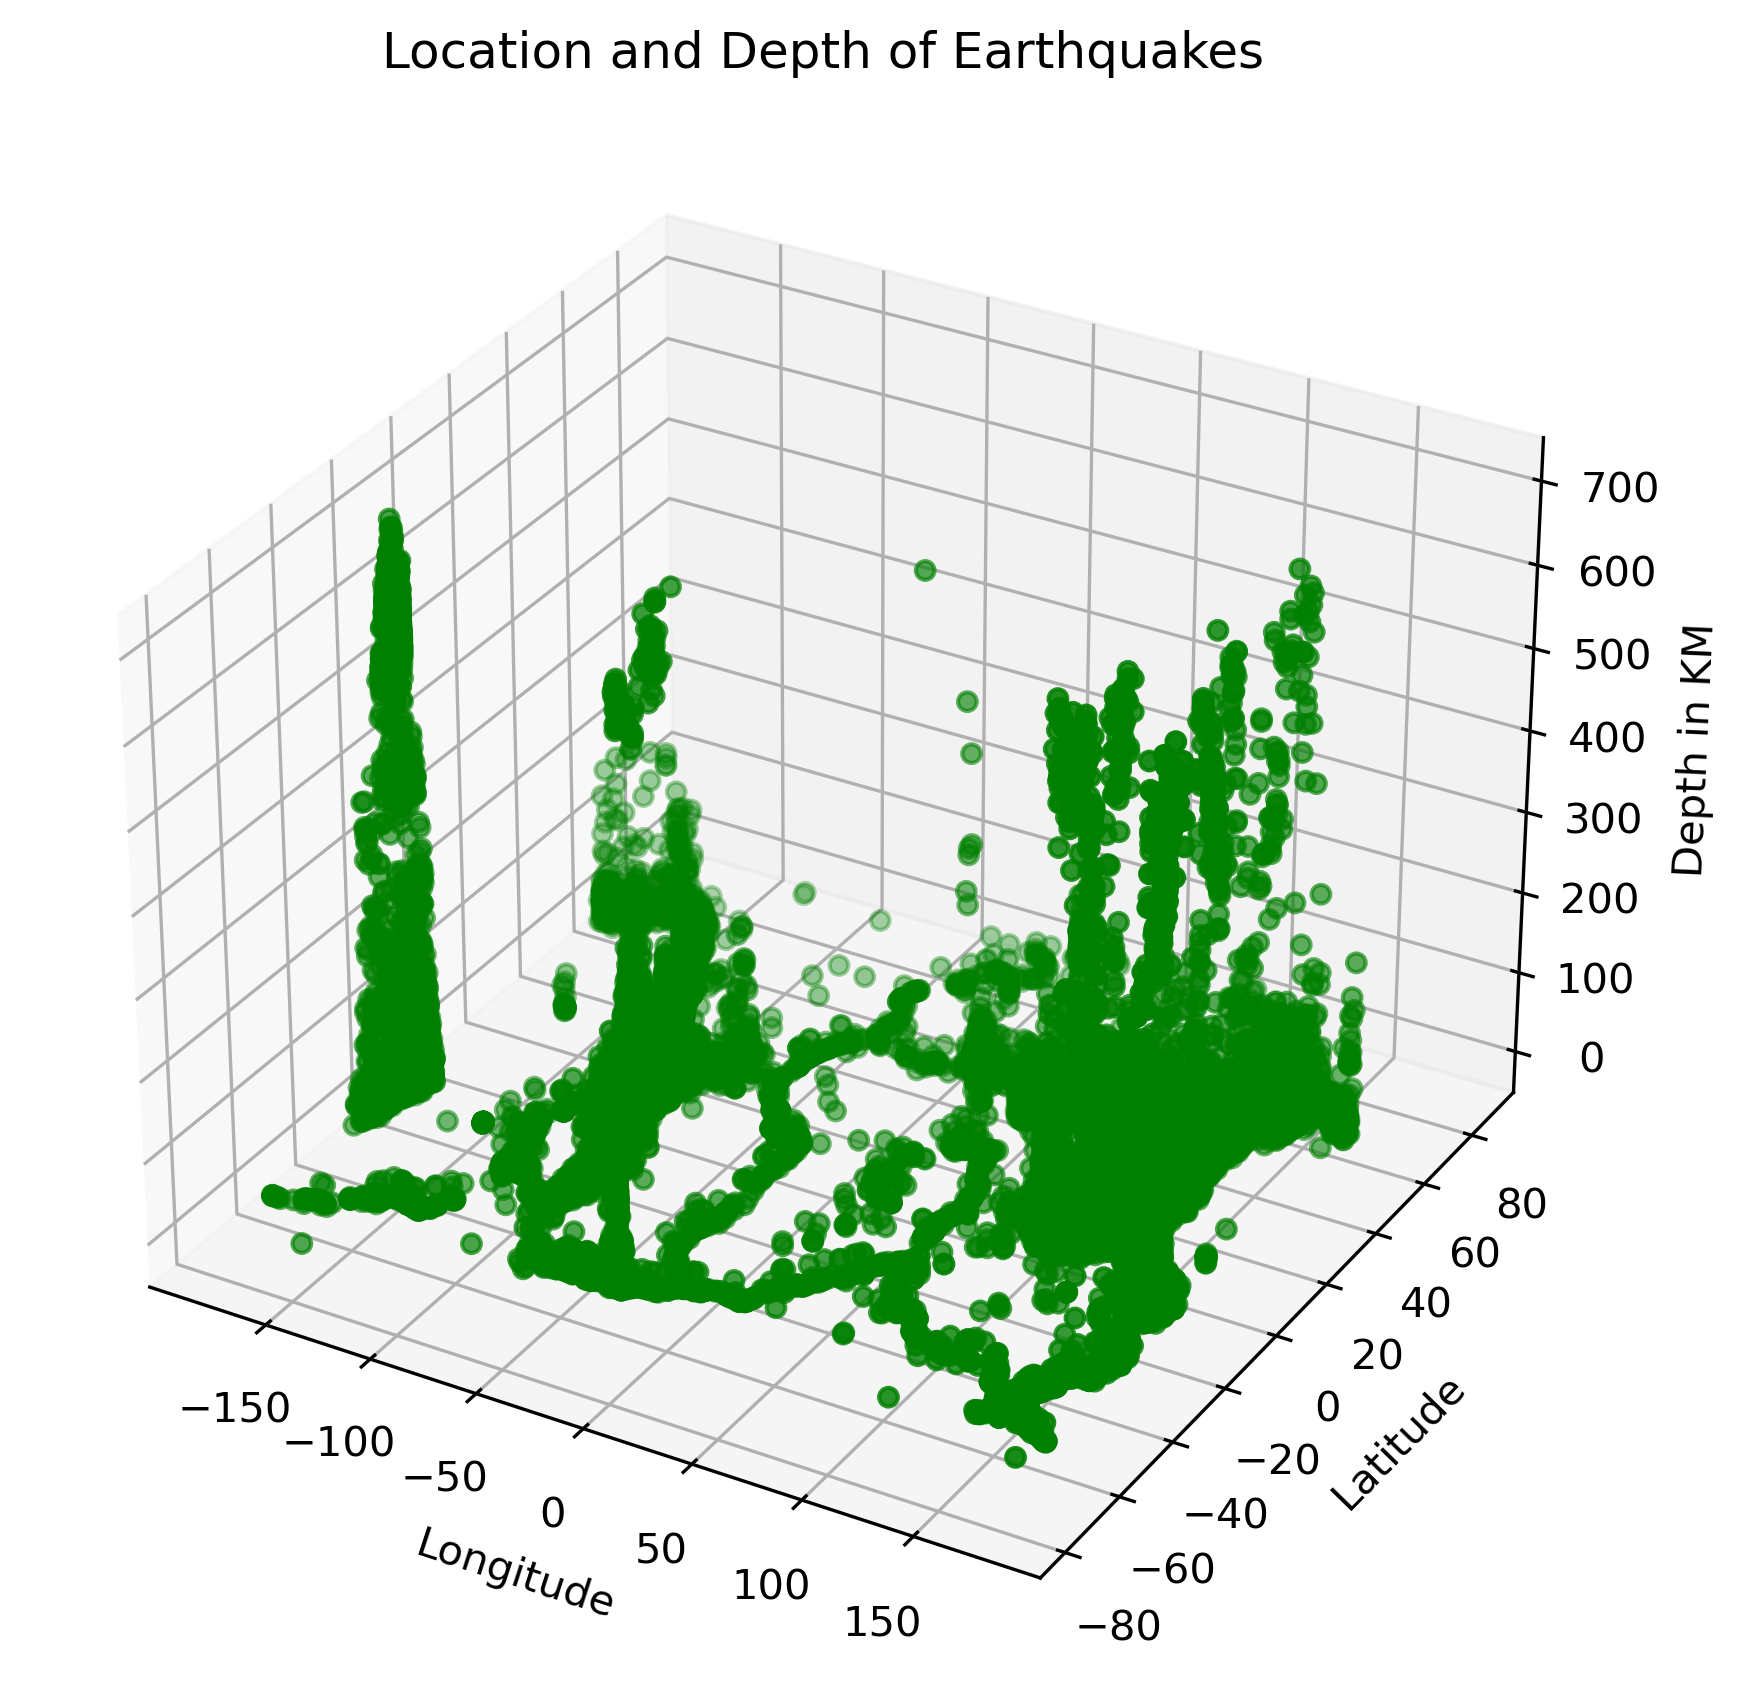

In [93]:
fig = plt.figure(figsize = (10, 7))
ax5 = plt.axes(projection ="3d")
ax5.set_title('Location and Depth of Earthquakes')
ax5.set_ylabel("Latitude")
ax5.set_xlabel("Longitude")
ax5.set_zlabel("Depth in KM")
              
ax5.scatter3D(df.Longitude, df.Latitude, df.Depth, color = "green")


plt.show()

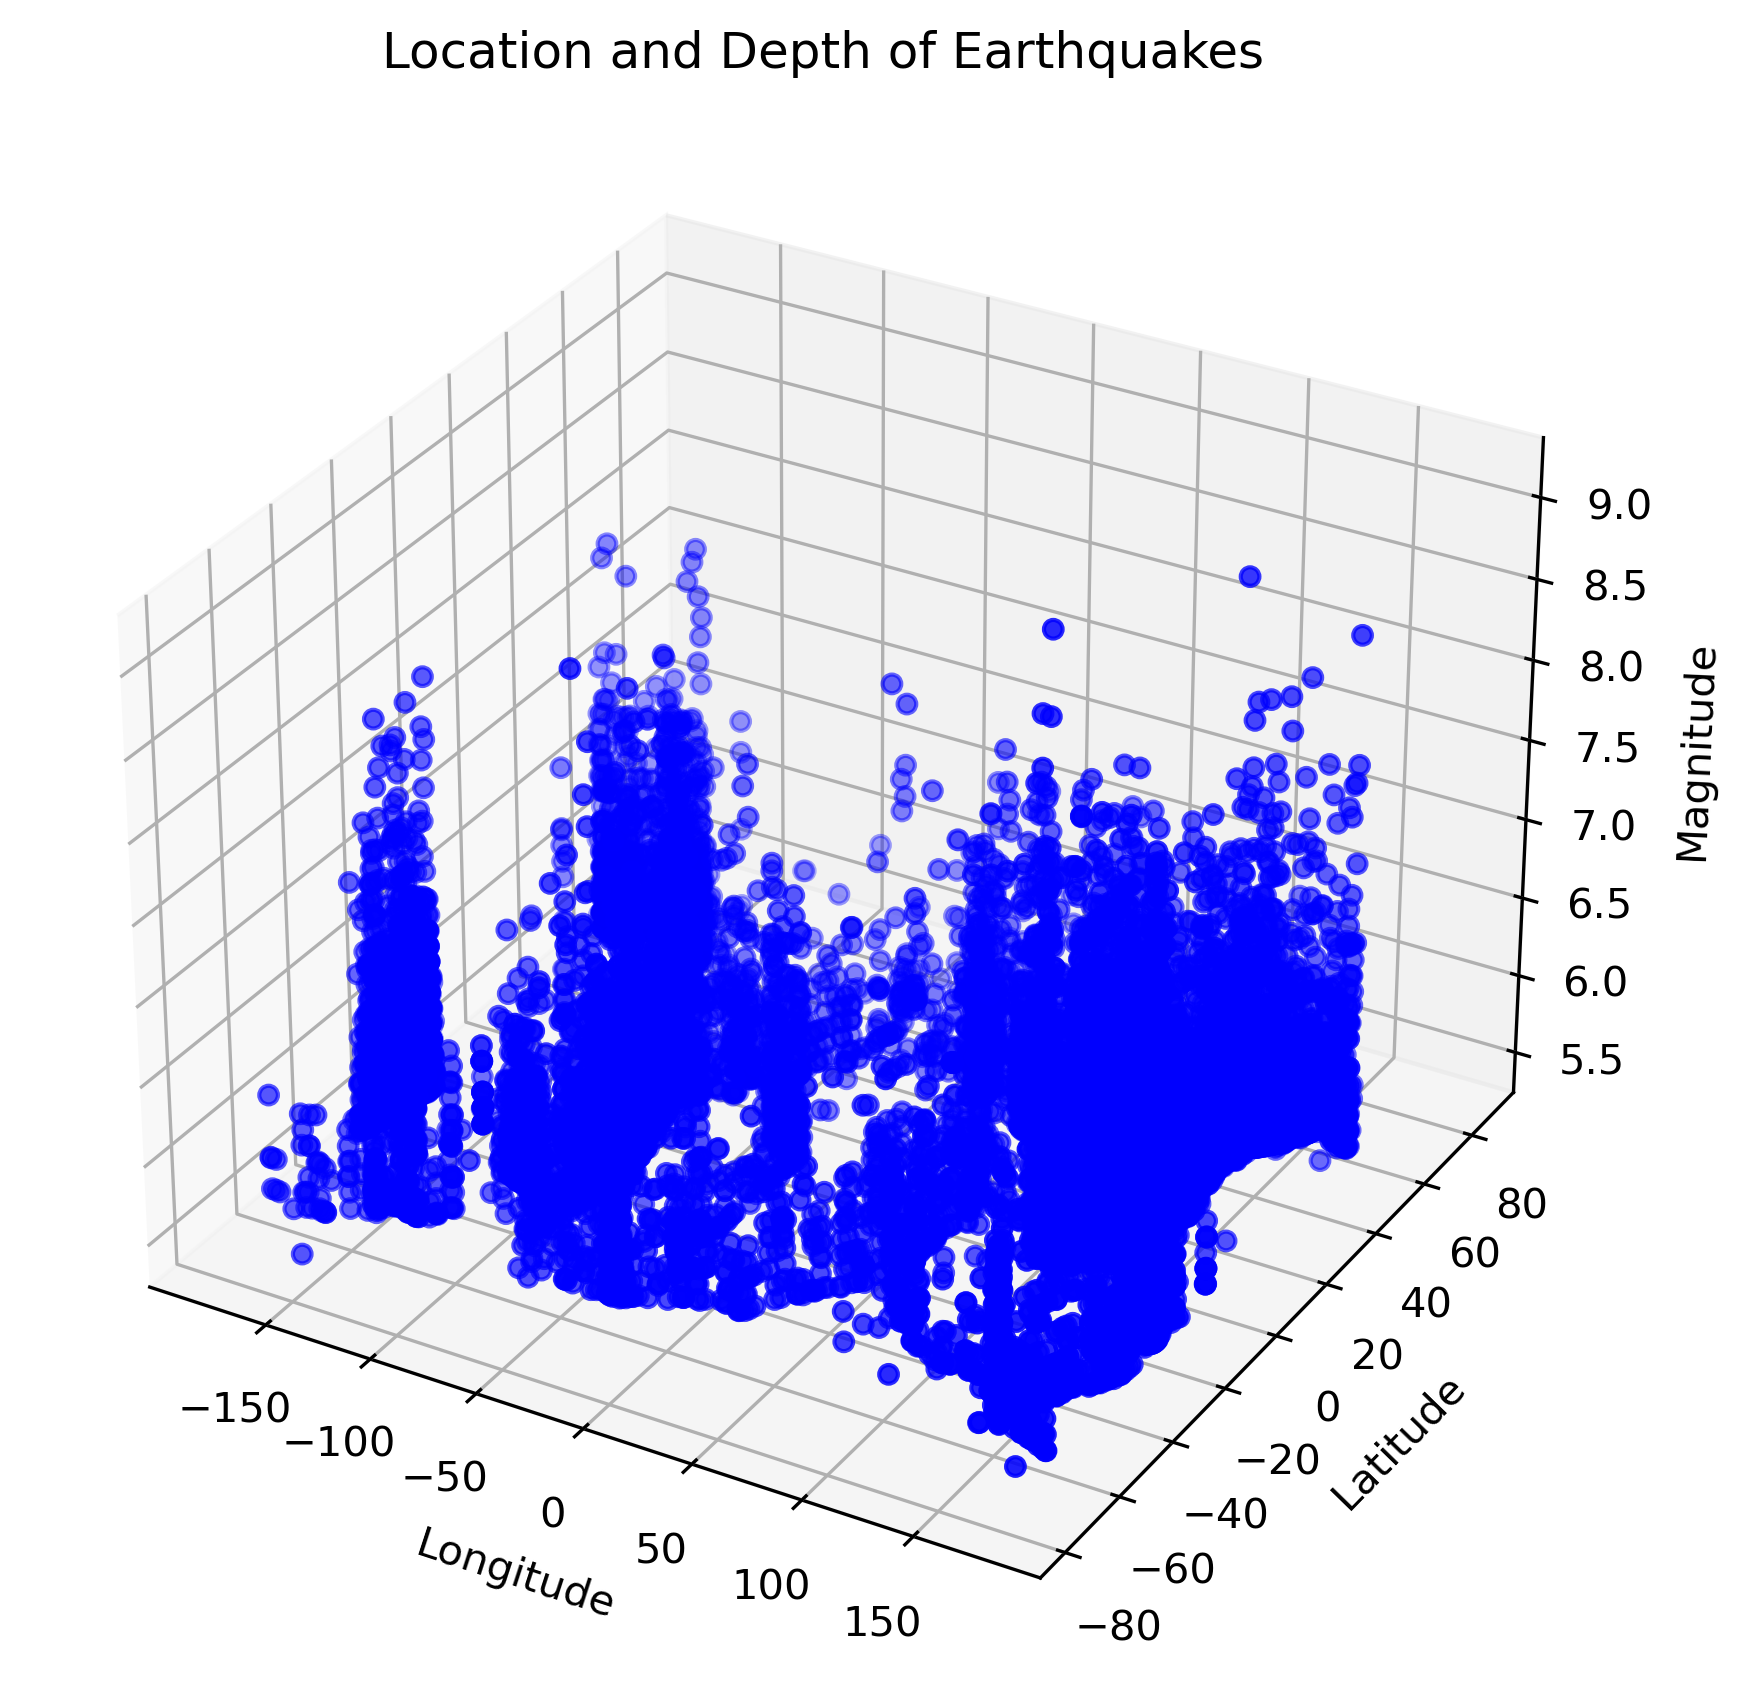

In [92]:
fig = plt.figure(figsize = (10, 7))
ax6 = plt.axes(projection ="3d")
ax6.set_title('Location and Depth of Earthquakes')
ax6.set_ylabel("Latitude")
ax6.set_xlabel("Longitude")
ax6.set_zlabel("Magnitude")
ax6.scatter3D(df.Longitude, df.Latitude, df.Magnitude, color = "blue")


plt.show()

https://stackoverflow.com/questions/26139423/plot-different-color-for-different-categorical-levels-using-matplotlib was used for the colour tip

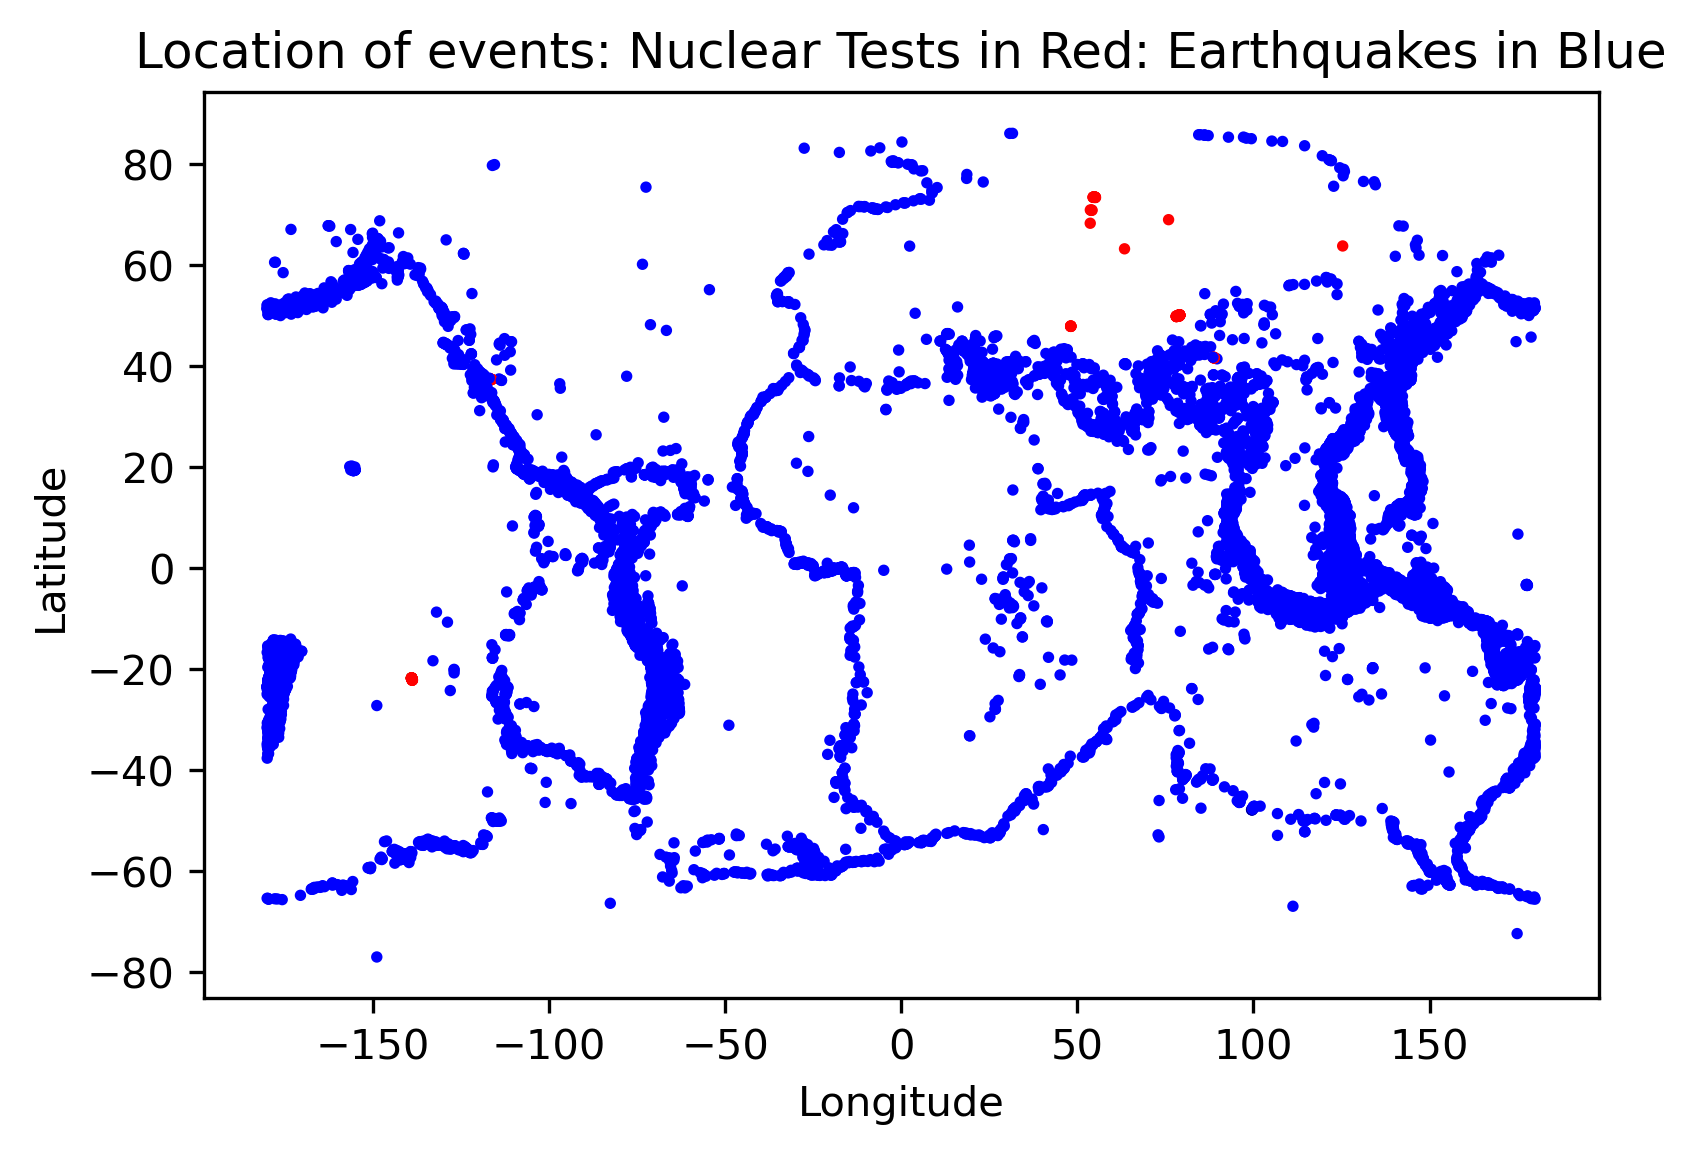

In [77]:
fig, ax7 = plt.subplots()
colors = {'Nuclear Explosion':'red', 'Earthquake':'blue', 'Explosion':'green', 'Rock Burst':'black'}
ax7.scatter(df.Longitude, df.Latitude, c=df.Type.apply(lambda x: colors[x]),s=3)
ax7.set_title('Location of events: Nuclear Tests in Red: Earthquakes in Blue')
ax7.set_ylabel("Latitude")
ax7.set_xlabel("Longitude")
plt.show()
